In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [113]:
#importing dataset
data = pd.read_csv('user_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [114]:
data.shape

(400, 5)

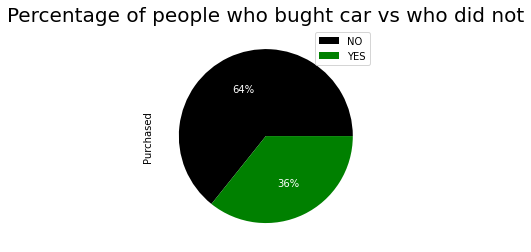

In [156]:
data['Purchased'].value_counts().plot.pie(autopct= '%1.0f%%',labels = ['NO',"YES"], colors = ['black','green'],textprops={'color': 'White'})
plt.title('Percentage of people who bught car vs who did not',fontsize = 20)
plt.legend()
plt.show()

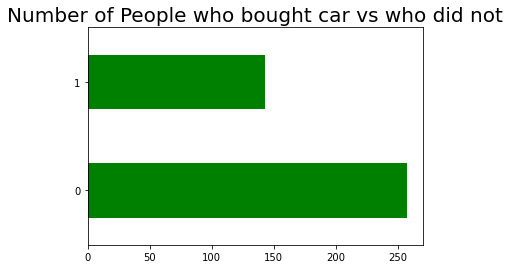

In [116]:
data['Purchased'].value_counts().plot(kind ='barh',color = 'green')
plt.title('Number of People who bought car vs who did not',fontsize = 20)
plt.show()

In [117]:
#so we observe that most of the population is not having car.

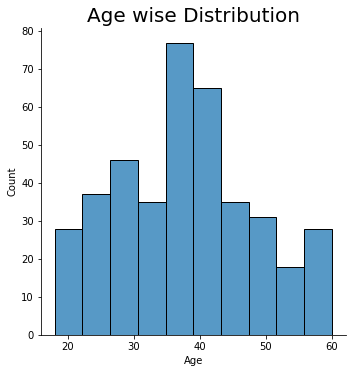

In [118]:
#lets check the distribution of age
ax = sns.displot(data['Age'])
plt.title('Age wise Distribution',fontsize = 20)
plt.show()

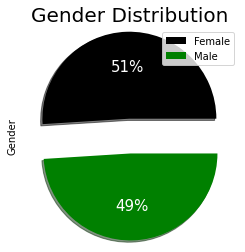

In [119]:
#Gender Distribution
data['Gender'].value_counts().plot.pie(autopct='%1.0f%%',colors = ['black','green'],
                                       shadow = True,explode = [0.2,0.2],labels=['',''],fontsize = 15,textprops={'color':'white'})
plt.title('Gender Distribution',fontsize=20)
plt.legend(['Female','Male'])


In [120]:
attr0 = data[data['Purchased']==0]
attr1 = data[data['Purchased']==1]

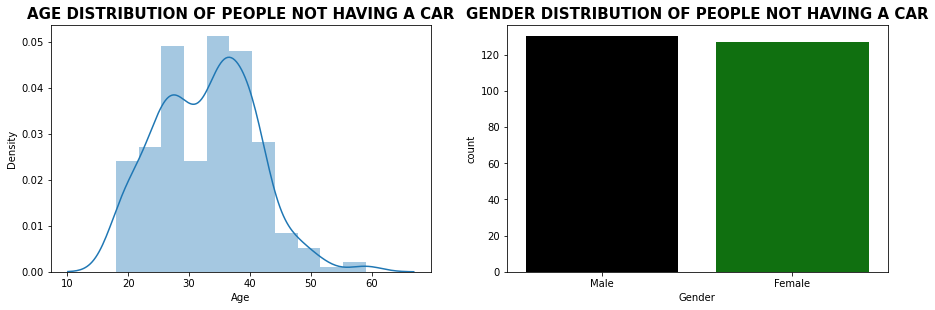

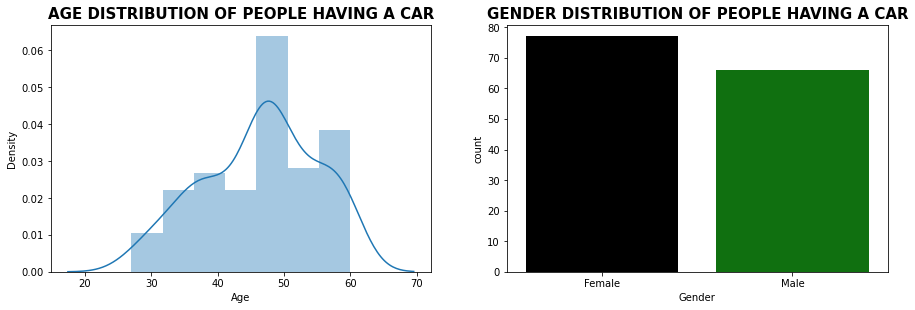

In [121]:
# plotting for those who does not own a car

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(attr0['Age'])
plt.title('AGE DISTRIBUTION OF PEOPLE NOT HAVING A CAR', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr0['Gender'], palette=['Black','green'])
plt.title('GENDER DISTRIBUTION OF PEOPLE NOT HAVING A CAR', fontsize=15, weight='bold' )
plt.show()



# plotting for those who own a car

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(attr1['Age'])
plt.title('AGE DISTRIBUTION OF PEOPLE HAVING A CAR', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((2,2),(0,1))
sns.countplot(attr1['Gender'], palette=['Black','green'])
plt.title('GENDER DISTRIBUTION OF PEOPLE HAVING A CAR', fontsize=15, weight='bold' )
plt.show()



Text(0.5, 1.0, 'Salary distribution of people not having a car')

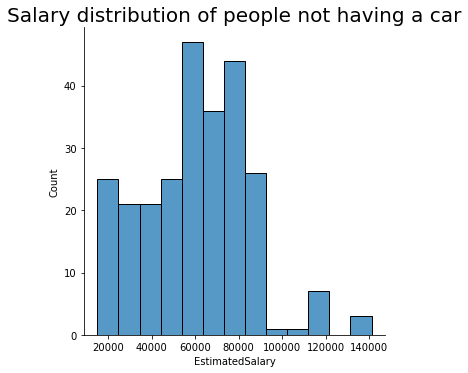

In [122]:
#salary distribution for pople not having a car
sns.displot(attr0['EstimatedSalary'])
plt.title('Salary distribution of people not having a car',fontsize=20)

Text(0.5, 1.0, 'Salary distribution of people having a car')

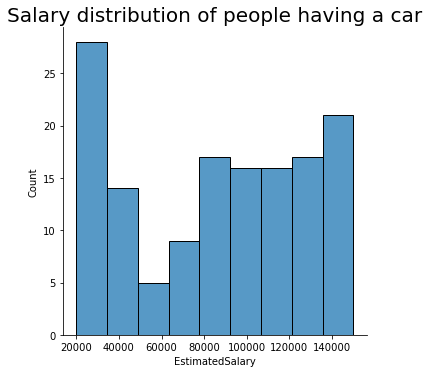

In [123]:
#salary distribution for pople having a car
sns.displot(attr1['EstimatedSalary'])
plt.title('Salary distribution of people having a car',fontsize=20)

In [124]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [125]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [126]:
#We see that gender column is of dtype object
#so we will use one hot encoding to convert it into numerical value

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
label_encoder = LabelEncoder()

In [134]:
data['Gender']=label_encoder.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [136]:
X = data.drop(['Purchased'],axis=1)
y = data['Purchased']

<AxesSubplot:title={'center':'Correlation with dependent variables'}>

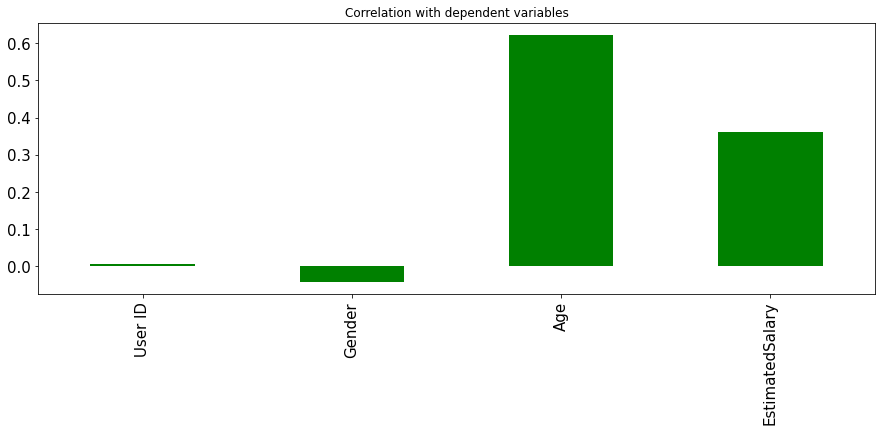

In [138]:
X.corrwith(y).plot.bar(figsize=(15,5),title = 'Correlation with dependent variables',fontsize=15,rot=90,color='green')

In [141]:
#we see that user id and age has very less value of correlation
#with the dependent variable 'Purchased' so we will drop them

In [149]:
data=data.drop(['User ID'],axis=1)

In [150]:
data = data.drop(['Gender'],axis=1)

In [151]:
data.shape

(400, 3)

In [152]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [154]:
X = data.drop(['Purchased'],axis=1)
y = data['Purchased']

In [157]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [158]:
#feature scaling
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
X_train = std_scl.fit_transform(X_train)
X_test = std_scl.fit_transform(X_test)

In [161]:
#fitting KNN classfier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [162]:
#predicting results
y_pred = classifier.predict(X_test)

In [163]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [166]:
#creating confucion matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [167]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [165]:
#so we have 64+29 = 93 correct predictions and 7 incorrect

In [168]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        68\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.93       100\n   macro avg       0.92      0.92      0.92       100\nweighted avg       0.93      0.93      0.93       100\n'

In [169]:
#choosing k value

In [171]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [172]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

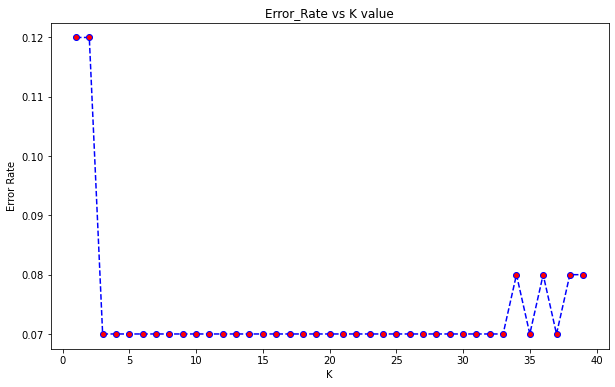

In [179]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed', marker='o',markerfacecolor='red')
plt.title('Error_Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [184]:
#we see that the error variation is of only 1% for k>3. so value of k
#that we choose seems ok